In [ ]:
import json
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import time

Importing dataset

In [ ]:
%%capture
!pip install transformers

In [ ]:
# Give the path for train data
path = Path('/content/dataset_train')

# Open .json file
with open(path, 'rb') as f:
    squad_dict = json.load(f)
texts = []
queries = []
answers = []

# Search for each passage, its question and its answer
for group in squad_dict['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
                texts.append(context)
                queries.append(question)
                answers.append(answer)

train_texts, train_queries, train_answers = texts, queries, answers

In [ ]:
print(train_texts[0:5])

['রোমান প্রজাতন্ত্র লাতিন: রেজ পাবলিকা রোমানা; ধ্রুপদী লাতিন: ːː ˈː.ɪ. ːˈː. ছিল প্রাচীন রোমান সভ্যতার সময়কাল যা রোমান রাজ্যের উত্থানের মধ্য দিয়ে শুরু হয়েছিল, তিহ্যগতভাবে খ্রিস্টপূর্ব ৫০৯ অবধি, এবং শেষ হয়েছিল  খ্রিস্টপূর্ব ২ ২৭ রোমান সাম্রাজ্য প্রতিষ্ঠার সাথে। এই সময়কালেই রোমের নিয়ন্ত্রণ শহরের তাত্ক্ষণিক আশেপাশের অঞ্চল থেকে সমগ্র ভূমধ্যসাগরীয় অঞ্চলে আধিপত্য বিস্তার করে। এর অস্তিত্বের প্রথম দুটি শতাব্দীতে রোমান প্রজাতন্ত্রের বিজয় এবং জোটের সংমিশ্রণের মধ্য দিয়ে মধ্য ইতালি থেকে পুরো ইতালীয় উপদ্বীপে প্রসারিত হয়েছিল। পরবর্তী শতাব্দীর মধ্যে এটি উত্তর আফ্রিকা, স্পেন এবং বর্তমানে দক্ষিণ ফ্রান্স যা অন্তর্ভুক্ত করেছিল। এর দুই শতাব্দী পরে, খ্রিস্টপূর্ব প্রথম শতাব্দীর শেষের দিকে, এর মধ্যে আধুনিক ফ্রান্স, গ্রিস এবং পূর্ব ভূমধ্যসাগরীয় অংশের বেশিরভাগ অংশ অন্তর্ভুক্ত ছিল। এই সময়ের মধ্যে, অভ্যন্তরীণ উত্তেজনা একের পর এক গৃহযুদ্ধের দিকে পরিচালিত করেছিল, যার পরিণতি জুলিয়াস সিজারের হত্যার সাথে ঘটেছিল, যা প্রজাতন্ত্র থেকে সাম্রাজ্যের দিকে উত্তরণের দিকে পরিচালিত করেছিল। পরিবর্তনের সঠিক তারিখ ব্য

In [ ]:
# Give the path for validation data
path = Path('/content/dataset_valid')

# Open .json file
with open(path, 'rb') as f:
    squad_dict = json.load(f)

texts = []
queries = []
answers = []

for group in squad_dict['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
                texts.append(context)
                queries.append(question)
                answers.append(answer)

val_texts, val_queries, val_answers = texts, queries, answers

In [ ]:
print(len(train_texts))
print(len(train_queries))
print(len(train_answers))

33934
33934
33934


In [ ]:
print(len(val_texts))
print(len(val_queries))
print(len(val_answers))

7488
7488
7488


In [ ]:
print("Passage: ",train_texts[8])
print("Query: ",train_queries[8])
print("Answer: ",train_answers[1309])

Passage:  নাগরিকদের দ্বারা প্রতিবছর নির্বাচিত হন এবং নিয়োগপ্রাপ্ত ম্যাজিস্ট্রেটদের সমন্বয়ে গঠিত সিনেটের পরামর্শ দিয়েছিলেন রোমান সরকারের নেতৃত্বে দুটি কনসাল। যেহেতু রোমান সমাজ আধুনিক মানদণ্ড দ্বারা অত্যন্ত শ্রেণিবদ্ধ ছিল, রোম সরকারের বিবর্তন তাত্ত্বিকদের মধ্যে লড়াই দ্বারা প্রচুর প্রভাবিত হয়েছিল, রোমের স্থল-অধিপতি অভিজাত, যিনি রোমের প্রতিষ্ঠার পূর্বসূরীর সন্ধান করেছেন এবং তাঁর পক্ষ থেকে আরও অনেক মানুষ ছিলেন নাগরিক-সাধারণের। সময়ের সাথে সাথে, প্যাট্রেসিদেরকে রোমের সর্বোচ্চ অফিসগুলিতে একচেটিয়া অধিকার প্রদান করা আইনগুলি বাতিল বা দুর্বল করা হয়েছিল এবং নেতৃস্থানীয় সুন্দরী পরিবারগুলি অভিজাত শ্রেণির পুরো সদস্য হয়ে ওঠে। প্রজাতন্ত্রের নেতারা একটি শক্তিশালী তিহ্য এবং নৈতিকতার বিকাশ করেছিলেন, যা জনসেবা ও শান্তি ও যুদ্ধের পৃষ্ঠপোষকতার প্রয়োজন, সামরিক ও রাজনৈতিক সাফল্যকে অনিচ্ছাকৃতভাবে সংযুক্ত করে। রোমের অনেক আইনী এবং আইনী কাঠামো পরে জাস্টিনিয়ান কোডে এবং পরে নেপোলিয়োনিক কোডে কোডেড এখনও আধুনিক দেশ রাষ্ট্র এবং আন্তর্জাতিক সংস্থাগুলিতে পুরো ইউরোপ এবং বিশ্বের বেশিরভাগ অংশ লক্ষ্য করা যায়।  
Q

As you can see we have 20302 passages, queries and answers from the validation data

In [ ]:
print(len(val_texts))
print(len(val_queries))
print(len(val_answers))

7488
7488
7488


In [ ]:
print("Passage: ",val_texts[0])
print("Query: ",val_queries[0])
print("Answer: ",val_answers[0])

Passage:  চার্লসটন আমেরিকা যুক্তরাষ্ট্রের দক্ষিণ ক্যারোলাইনা রাজ্যের প্রাচীনতম এবং দ্বিতীয় বৃহত্তম শহর, চার্লসটন কাউন্টির কাউন্টি আসন এবং চার্লসটন – নর্থ চার্লসটন – সামারভিলে মেট্রোপলিটন স্ট্যাটিস্টিকাল এরিয়ার প্রধান শহর  শহরটি দক্ষিণ ক্যারোলিনার উপকূলরেখার ভৌগলিক মিডপয়েন্টের ঠিক দক্ষিণে অবস্থিত এবং অ্যাশলে এবং কুপার নদীর নদীর সংগম দ্বারা গঠিত আটলান্টিক মহাসাগরের একটি খাঁটি চার্লস্টন হারবারে অবস্থিত, অথবা স্থানীয়ভাবে প্রকাশিত হয়েছে, "যেখানে কুপার এবং অ্যাশলে রয়েছে। নদীগুলি একত্র হয়ে আটলান্টিক মহাসাগর গঠনে আসে। "  
Query:  চার্লসটন, দক্ষিণ ক্যারোলিনা কোন কাউন্টিতে অবস্থিত?  
Answer:  {'text': 'চার্লসটন আমেরিকা য', 'answer_start': 0}


Find end position character in train data

In [ ]:
for answer, text in zip(train_answers, train_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    # Get the real end index
    end_idx = start_idx + len(real_answer)

    # Deal with the problem of 1 or 2 more characters
    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx
    # When the real answer is more by one character
    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1
    # When the real answer is more by two characters
    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2

Find end position character in validation data

In [ ]:
for answer, text in zip(val_answers, val_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    # Get the real end index
    end_idx = start_idx + len(real_answer)

    # Deal with the problem of 1 or 2 more characters
    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx
    # When the real answer is more by one character
    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1
    # When the real answer is more by two characters
    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2

In [ ]:
from transformers import AutoTokenizer,AdamW,BertForQuestionAnswering
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(train_texts, train_queries, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, val_queries, truncation=True, padding=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def add_token_positions(encodings, answers):
  start_positions = []
  end_positions = []

  count = 0

  for i in range(len(answers)):
    start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
    end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

    # if start position is None, the answer passage has been truncated
    if start_positions[-1] is None:
      start_positions[-1] = tokenizer.model_max_length

    # if end position is None, the 'char_to_token' function points to the space after the correct token, so add - 1
    if end_positions[-1] is None:
      end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] - 1)
      # if end position is still None the answer passage has been truncated
      if end_positions[-1] is None:
        count += 1
        end_positions[-1] = tokenizer.model_max_length

  print(count)

  # Update the data in dictionary
  encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

3412
808


In [ ]:
class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

In [ ]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available()
                      else 'cpu')

Build model

In [ ]:
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased').to(device)

optim = AdamW(model.parameters(), lr=5e-5)
# optim = AdamW(model.parameters(), lr=3e-5)
# optim = AdamW(model.parameters(), lr=2e-5)

epochs = 3

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## ***Step 11:*** Train and Evaluate Model

Training of model was done exactly as in the previous projects.

In [ ]:
whole_train_eval_time = time.time()

train_losses = []
val_losses = []

print_every = 1000

for epoch in range(epochs):
  epoch_time = time.time()

  # Set model in train mode
  model.train()

  loss_of_epoch = 0

  print("############Train############")

  for batch_idx,batch in enumerate(train_loader):

    optim.zero_grad()

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)

    outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
    loss = outputs[0]
    # do a backwards pass
    loss.backward()
    # update the weights
    optim.step()
    # Find the total loss
    loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
      print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(train_loader)
  train_losses.append(loss_of_epoch)
  model.eval()

  print("############Evaluate############")

  loss_of_epoch = 0

  for batch_idx,batch in enumerate(val_loader):

    with torch.no_grad():

      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      start_positions = batch['start_positions'].to(device)
      end_positions = batch['end_positions'].to(device)

      outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
      loss = outputs[0]
      # Find the total loss
      loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
       print("Batch {:} / {:}".format(batch_idx+1,len(val_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(val_loader)
  val_losses.append(loss_of_epoch)

  # Print each epoch's time and train/val loss
  print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nValidation Loss:", val_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))

############Train############
Batch 1000 / 2121 
Loss: 4.5 

Batch 2000 / 2121 
Loss: 4.4 

############Evaluate############

-------Epoch  1 -------
Training Loss: 4.567316663765446 
Validation Loss: 4.273773305436485 
Time:  3301.788074731827 
----------------------- 


############Train############
Batch 1000 / 2121 
Loss: 4.4 

Batch 2000 / 2121 
Loss: 3.6 

############Evaluate############

-------Epoch  2 -------
Training Loss: 4.197817113814294 
Validation Loss: 3.906806163298778 
Time:  3302.425184249878 
----------------------- 


############Train############
Batch 1000 / 2121 
Loss: 3.4 

Batch 2000 / 2121 
Loss: 2.9 

############Evaluate############

-------Epoch  3 -------
Training Loss: 3.6889800547654197 
Validation Loss: 3.6472154641762757 
Time:  3300.955411195755 
----------------------- 


Total training and evaluation time:  9905.176273107529


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Save model
torch.save(model,"/content/gdrive/MyDrive/Datasets/CSE437")

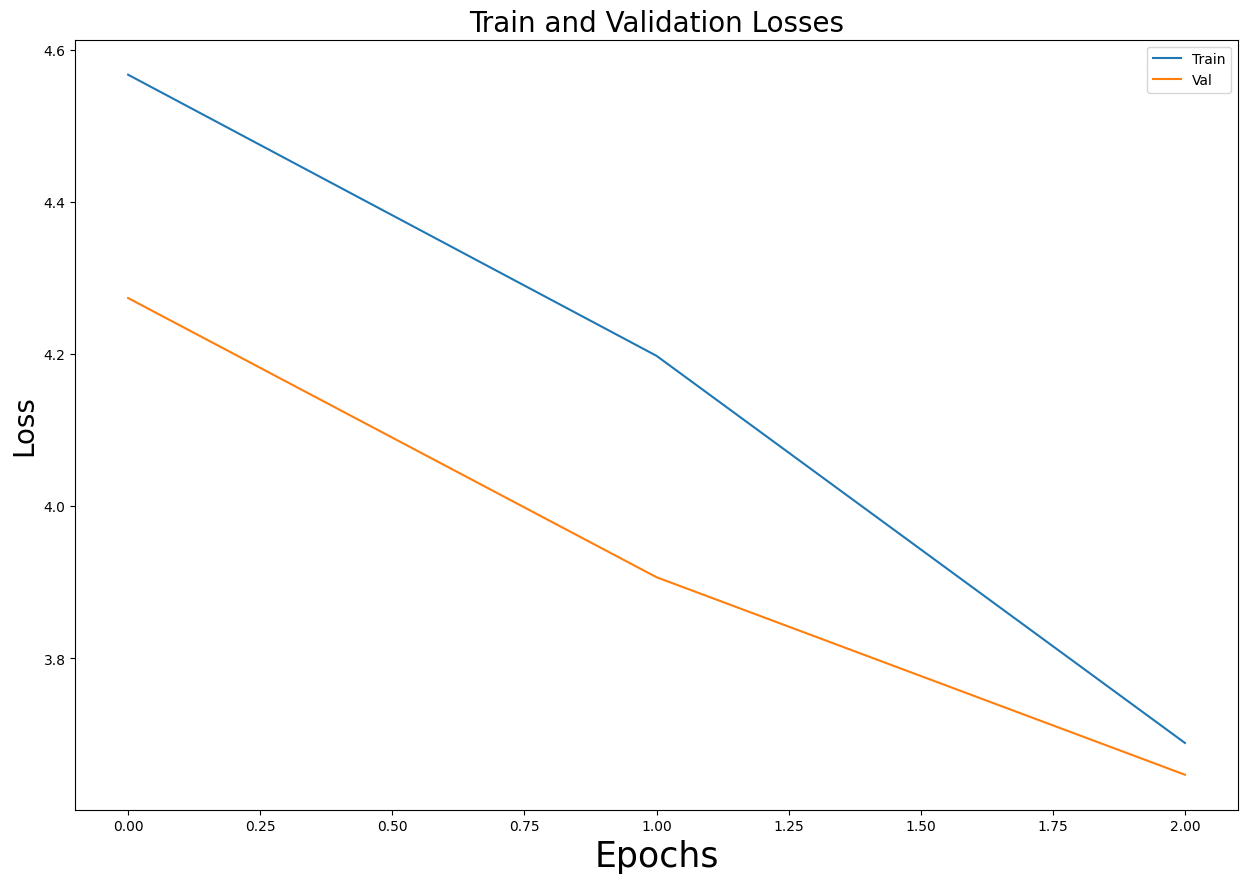

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20)
ax.set_xlabel('Epochs', fontsize = 25)
_=ax.plot(train_losses)
_=ax.plot(val_losses)
_=ax.legend(('Train','Val'),loc='upper right')